In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [4]:
data=pd.read_csv('DOGE-USD.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [6]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [7]:
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data.set_index('Date',inplace=True)
data.isnull().any()

/tmp/ipython-input-2320437623.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)


,0
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True


In [8]:
data.isnull().sum()

,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [9]:
data=data.dropna()

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Volume of DogeCoin')

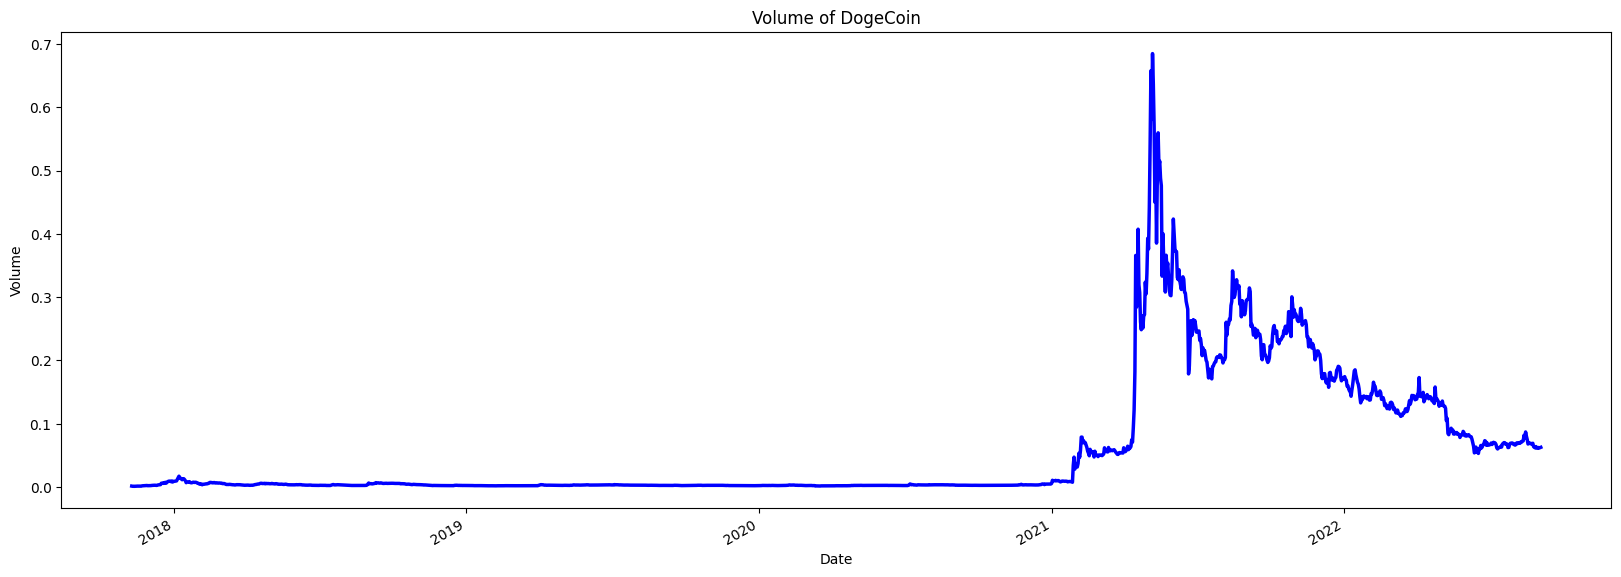

In [13]:
plt.figure(figsize=(20,7))
x=data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5,color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of DogeCoin')


In [14]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

,Close
Close,1.000000
Adj Close,1.000000
High,0.995104
Low,0.994575
Open,0.992514
Volume,0.588678
b,0.456479
gap,0.383333
a,0.172057
z,0.063251


In [15]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [16]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)


(11, 5) (19, 5)


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Tue, 05 Aug 2025   AIC                            -79.326
Time:                        13:38:14   BIC                            -76.905
Sample:                    08-05-2022   HQIC                           -81.981
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

In [18]:
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

,predicted_mean
2022-08-16,0.097293
2022-08-17,0.083717
2022-08-18,0.075957
2022-08-19,0.069575
2022-08-20,0.071583
2022-08-21,0.072099
2022-08-22,0.071244
2022-08-23,0.072458
2022-08-24,0.072406
2022-08-25,0.071893


<Axes: xlabel='Date'>

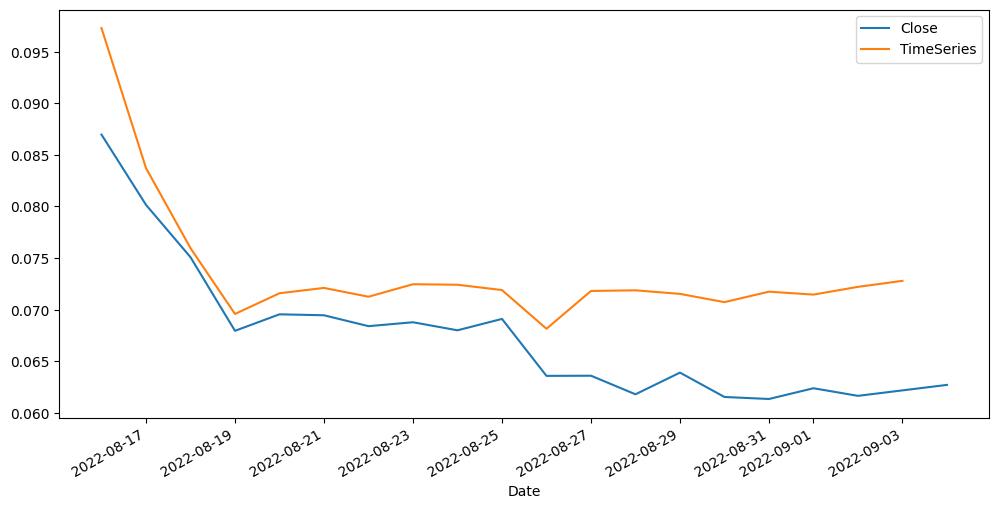

In [19]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)